In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [49]:
# Simulates 1 trajectory of the model
class Rings:
    
    
    #Inicialization
    def __init__(self, ResInit, MutInit, FRes, FMut, BirthRate, DeathRate):
        #System constants
        self.FitA  = FRes
        self.FitB  = FMut
        #Initial conditions
        self.Size = ResInit + MutInit 
        self.SizeA = ResInit
        self.SizeB = MutInit
        self.BRate = BirthRate 
        self.DRate = DeathRate
        #Time variables
        self.Time    = 0
        self.Size_t  = self.Size
        self.SizeA_t = self.SizeA
        self.SizeB_t = self.SizeB
        self.BRate_t = self.BRate
        self.DRate_t = self.DRate   
        #Birth time variables   
        self.BProb_t  = self.BRate_t / ( self.BRate_t + self.Size_t * self.DRate_t )
        self.BProbA_t = (self.SizeA_t * self.FitA)/( self.SizeA_t * self.FitA + self.SizeB_t * self.FitB )
        self.BProbB_t = (self.SizeB_t * self.FitB)/( self.SizeA_t * self.FitA + self.SizeB_t * self.FitB )
        #Death time variables
        self.DProb_t  = (self.Size_t * self.DRate_t) / ( self.BRate_t + self.Size_t * self.DRate_t )
        self.DProbA_t = self.SizeA_t / self.Size_t
        self.DProbB_t = self.SizeB_t / self.Size_t    
        #Graphing
        self.TimeEvol = np.array([0])
        self.SizeEvol = np.array([self.Size])
        self.SizeAEvol = np.array([self.SizeA]) 
        self.SizeBEvol = np.array([self.SizeB]) 
    
    
    #Sets time dependent variables to initial values
    def reset(self):
        #Time variables
        self.Time    = 0
        self.Size_t  = self.Size
        self.SizeA_t = self.SizeA
        self.SizeB_t = self.SizeB
        self.BRate_t = self.BRate
        self.DRate_t = self.DRate   
        #Birth time variables   
        self.BProb_t  = self.BRate_t / ( self.BRate_t + self.Size_t * self.DRate_t )
        self.BProbA_t = (self.SizeA_t * self.FitA)/( self.SizeA_t * self.FitA + self.SizeB_t * self.FitB )
        self.BProbB_t = (self.SizeB_t * self.FitB)/( self.SizeA_t * self.FitA + self.SizeB_t * self.FitB )
        #Death time variables
        self.DProb_t  = (self.Size_t * self.DRate_t) / ( self.BRate_t + self.Size_t * self.DRate_t )
        self.DProbA_t = self.SizeA_t / self.Size_t
        self.DProbB_t = self.SizeB_t / self.Size_t          
        #graphing
        self.TimeEvol = np.array([0])
        self.SizeEvol = np.array([self.Size])
        self.SizeAEvol = np.array([self.SizeA]) 
        self.SizeBEvol = np.array([self.SizeB]) 
        
    def update_prob(self):
        #Birth time variables  
        self.BProb_t  = self.BRate_t / ( self.BRate_t + self.Size_t * self.DRate_t )
        self.BProbA_t = (self.SizeA_t * self.FitA)/( self.SizeA_t * self.FitA + self.SizeB_t * self.FitB )
        self.BProbB_t = (self.SizeB_t * self.FitB)/( self.SizeA_t * self.FitA + self.SizeB_t * self.FitB )
        #Death time variables
        self.DProb_t  = (self.Size_t * self.DRate_t) / ( self.BRate_t + self.Size_t * self.DRate_t )
        self.DProbA_t = self.SizeA_t / self.Size_t
        self.DProbB_t = self.SizeB_t / self.Size_t  
    
    #one_run: simulates the process and updates the number of residents and mutants alive at time T
    def one_run (self,T): 
        
        #Setup initial conditions    
        self.reset()
        
        
        while ( self.Time < T ):
              
            #Define waiting time until next system update
            W = np.random.exponential ( self.BRate + self.Size_t * self.DRate )            
            #Update time
            self.Time = self.Time + W
            
            #Update population size and type
            S = np.random.uniform(0,1)
            R = np.random.uniform(0,1)
            if S < self.BProb_t:
                #reproduction
                self.Size_t = self.Size_t + 1
                if R < self.BProbA_t:
                    self.SizeA_t = self.SizeA_t + 1
                else: 
                    self.SizeB_t = self.SizeB_t + 1
            else: 
                #death
                self.Size_t = self.Size_t - 1
                if R < self.DProbA_t:
                    self.SizeA_t = self.SizeA_t - 1
                else:
                    self.SizeB_t = self.SizeB_t - 1
            
            #Update rate? Or is rate a constant?
           
            #Update probabilities
            
            if ( self.Size_t == 0):
                print("Simulation: extintion")
                break
            else:   
                self.update_prob()
            
        
            #Save updated time and size
            self.TimeEvol = np.append(self.TimeEvol, [self.Time])
            self.SizeEvol = np.append(self.SizeEvol, [self.Size_t])
            self.SizeAEvol  = np.append (self.SizeAEvol, [self.SizeA_t])
            self.SizeBEvol  = np.append (self.SizeBEvol, [self.SizeB_t])
            
            
        #Plot
        plt.figure(1)
        plt.plot(self.TimeEvol, self.SizeEvol)
        plt.figure(2)
        plt.plot(self.TimeEvol, self.SizeAEvol)
        plt.plot(self.TimeEvol, self.SizeBEvol)
     
    
    #simulation calls the function one_run(T) repeatedly, 
    #NumRuns number of times and returns the average number of cells at time T across multiple runs.
    def simulation(self, T, NumRuns):
        
        TotalSize = 0
        
        TimeEvolAverage = np.array([0])
        SizeEvolAverage = np.array([self.Size])
        
        for n in range(0, NumRuns):
            self.one_run (T)
            TotalSize = TotalSize + self.Size_t 
      
       
        AverageSize = TotalSize / NumRuns 
        
        return AverageSize

        
    
    

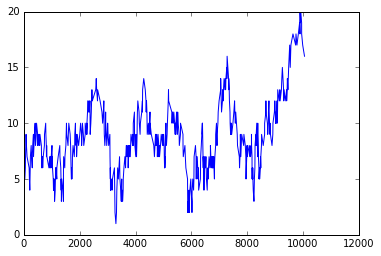

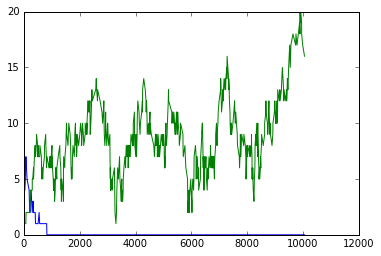

In [50]:
ResInit =  6
MutInit =  1
FRes = 1 
FMut = 2 
BirthRate = 8 
DeathRate = 1
X = Rings(ResInit, MutInit, FRes, FMut, BirthRate, DeathRate)
X.one_run(10000)

7.8

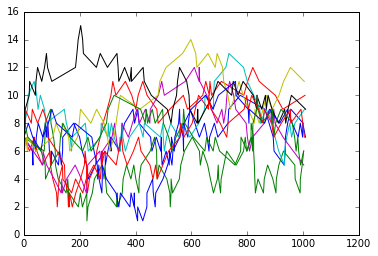

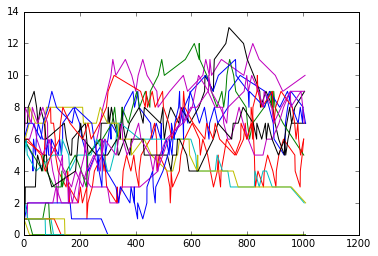

In [52]:
X.simulation(1000,10)